<h1>The Impact of COVID-19 on Unemployment Rate in Canadian Provinces</h1>

<h3>Note</h3>

The files required to display the canadian map can be found at the following website and the path to the file needs to be inserted <a href=#shapefile>here</a> at the following section of the notebook :

https://www12.statcan.gc.ca/census-recensement/alternative_alternatif.cfm?l=eng&dispext=zip&teng=lpr_000b16a_e.zip&k=%20%20%20%2027960&loc=http://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lpr_000b16a_e.zip


<b>Labour Force Survey, May 2020</b>

Source : https://www150.statcan.gc.ca/n1/daily-quotidien/200605/dq200605a-eng.htm 


Summary focusing on the section entitled "Employment picture varies widely by sector and province"of the Labour Force Survey of May 2020

According to the labour Force Survey, beginning in mid-March 2020, several measures including travel restrictions, business closures and physical distancing measures were implemented in Canada due to COVID-19. These measures led to an intentional shutdown of the economy to protect the public health. As of mid-April 2020, the shutdown caused significant disruption to the Canadian labour market such as employment losses of more than 3 million. The May survey reflects the labour market conditions as of week of May 10 to May 16. By that period, restrictions were reevaluated and varied by provinces. The unemployment rate and change of unemployment rate from the previous month in each of the province in May are shown in the table below. These results are coherent with the analysis carried out below. 
<table>
  <tr>
    <th>Province</th>
    <th>Change</th>
    <th>Unemployment Rate in May 2020</th>
  </tr>
  <tr>
    <td>Quebec</td>
    <td>-3.3%</td>
    <td>13.7%</td>
  </tr>
   <tr>
    <td>Ontario</td>
    <td>+2.3%</td>
    <td>13.6%</td>
  </tr>
   <tr>
    <td>British Columbia</td>
    <td>+1.9%</td>
    <td>13.4%</td>
  </tr>
   <tr>
    <td>Alberta</td>
    <td>+2.1%</td>
    <td>15.5%</td>
  </tr>
   <tr>
   <td>Manitoba</td>
    <td>-0.2%</td>
    <td>11.2%</td>
  </tr>    

  <tr>
    <td>Saskatchewan</td>
    <td>+1.2%</td>
    <td>12.5%</td>
  </tr>
  <tr>
    <td>New Brunswick</td>
    <td>-0.4%</td>
    <td>12.8%</td>
  </tr>
   <tr>
    <td>Nova Scotia</td>
    <td>+1.6%</td>
    <td>13.6%</td>
  </tr>
  <tr>
    <td>Prince Edward Island</td>
    <td>+3.1%</td>
    <td>13.9%</td>
  </tr>  
  <tr>
    <td>Newfoundland and Labrador</td>
    <td>+0.3%</td>
    <td>16.3%</td>
  </tr>  
</table>




In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import geopandas

In [2]:
#Read data
#Source: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410010701&pickMembers%5B0%5D=1.1&pickMembers%5B1%5D=2.1&cubeTimeFrame.startMonth=08&cubeTimeFrame.startYear=2019&cubeTimeFrame.endMonth=12&cubeTimeFrame.endYear=2020&referencePeriods=20190801%2C20201201 
df = pd.read_csv('data_part3/unemployment_can_14100287_subset.csv')
df_meta = pd.read_csv('data_part3/unemployment_can_14100287_MetaData.csv')

In [3]:
#Set data point on unemployement to 15 of each month since according to the labour force survey suggest the data seemt to
#market labour conditions around the 8 to 16
df['REF_DATE'] = df['REF_DATE'] + '-' + '15'
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])
date_form = DateFormatter("%Y-%m")

In [4]:
x_axis = pd.date_range('2019-02-28', periods=22, freq='M')


In [5]:
#Filters
unemployment_rate = df['Labour force characteristics'] == 'Unemployment rate'
seasonally_adjusted = df['Data type'] == 'Seasonally adjusted'
std_estimate = df['Statistics'] == 'Standard error of estimate'
estimate = df['Statistics'] == 'Estimate'
canada = df['GEO'] == 'Canada'
fifteen_plus = df['Age group'] == '15 years and over'
both_sexes = df['Sex'] == 'Both sexes'

<h2>Unemployment by province</h2>

In [6]:
#Filter df by columns
columns = [
    'REF_DATE', 
    'GEO',
    'Labour force characteristics',
    'Sex','Age group', 
    'Statistics',
    'Data type',
    'UOM',
    'UOM_ID',
    'SCALAR_FACTOR',
    'SCALAR_ID',
    'VALUE', 
    'STATUS',
    'DECIMALS']

df_u_provinces = df[columns]
df_u_provinces = df_u_provinces[unemployment_rate & estimate & seasonally_adjusted & both_sexes & fifteen_plus]


In [7]:
#Filter df by provinces
provinces = [
 'Newfoundland and Labrador',
 'Prince Edward Island',
 'Nova Scotia',
 'New Brunswick',
 'Quebec',
 'Ontario',
 'Manitoba',
 'Saskatchewan',
 'Alberta',
 'British Columbia']

In [8]:
#Unemployment rate estimate by province, both sexes, fifteen and over, seasonally adjusted
df_u_provinces = df_u_provinces[df_u_provinces['GEO'].isin(provinces)]

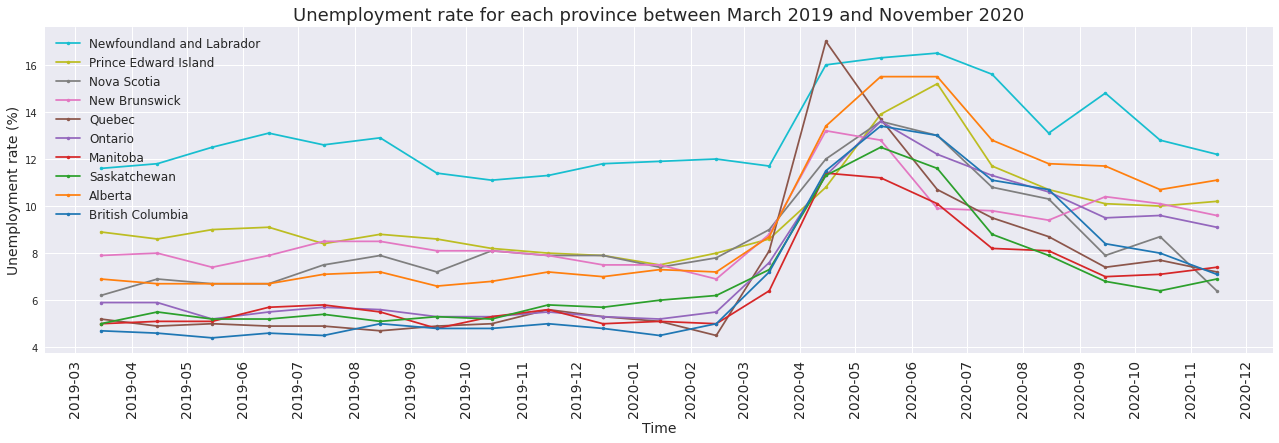

In [9]:
#Unemployment rate estimate by province, both sexes, fifteen and over, seasonally adjusted
mpl.style.use('seaborn')
fig,ax = plt.subplots(figsize=(22,6))
TIME_START = '2019-03'
TIME_END = '2020-11'
t_start = pd.DatetimeIndex([TIME_START])
t_end = pd.DatetimeIndex([TIME_END])
color_lines = list(mcolors.TABLEAU_COLORS.values())
for p in provinces:
    df_temp = df_u_provinces[df_u_provinces['GEO']==p]
    df_temp = df_temp.set_index(df_temp['REF_DATE'])
    df_temp = df_temp[TIME_START : TIME_END]    
    plt.plot(df_temp.index, df_temp['VALUE'], marker = '.',color = color_lines.pop(),label=p)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Unemployment rate (%)', fontsize=14)
    plt.title(f'Unemployment rate for each province between {t_start.month_name()[0]} {t_start.year[0]} \
and {t_end.month_name()[0]} {t_end.year[0]}', fontsize=18)
    plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=90, fontsize=14)
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# Function to generate png figure disabled
# fig.savefig(f'charts/unemployment_vs_time.png', 
#               dpi=300, format='png', 
#               bbox_inches='tight')
plt.show()
plt.close()

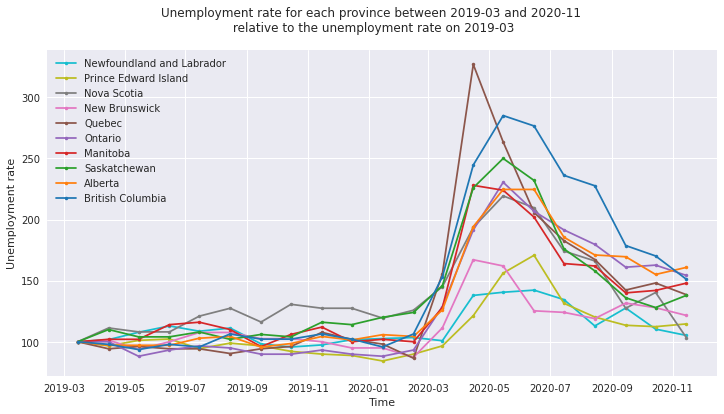

In [10]:
#Unemployment rate estimate by province, both sexes, fifteen and over, seasonally adjusted - indexed from 2019-11 
mpl.style.use('seaborn')
fig,ax = plt.subplots(figsize=(12,6))
TIME_START = '2019-03'
TIME_END = '2020-11'
REFERENCE_DATE = TIME_START
color_lines = list(mcolors.TABLEAU_COLORS.values())
for p in provinces:
    df_temp = df_u_provinces[df_u_provinces['GEO']==p]
    df_temp = df_temp.set_index(df_temp['REF_DATE'])
    df_temp = df_temp[TIME_START : TIME_END]
    REFERENCE_VALUE = df_temp.loc[REFERENCE_DATE]['VALUE'].values[0]
    df_temp['VALUE_INDEX'] = df_temp['VALUE']/REFERENCE_VALUE*100
    plt.plot(df_temp.index, df_temp['VALUE_INDEX'], marker = '.', color = color_lines.pop(), label=p)
    plt.xlabel('Time')
    plt.ylabel('Unemployment rate')
    plt.suptitle(f'Unemployment rate for each province between {TIME_START} and {TIME_END}\n relative to the unemployment rate on {TIME_START}')
    plt.legend()
plt.show()

<h2><a id="shapefile">Unemployment on a map</id></h2>

In [11]:
#Read data from source file
#Source - https://www12.statcan.gc.ca/census-recensement/alternative_alternatif.cfm?l=eng&dispext=zip&teng=lpr_000b16a_e.zip&k=%20%20%20%2027960&loc=http://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lpr_000b16a_e.zip
#Insert shapefile path and file below
file = 'data_part3/lpr_000b16a_e/lpr_000b16a_e.shp'
canada_map = geopandas.read_file(file)


In [12]:
#Filter canadian map for provinces
provinces = ['Newfoundland and Labrador',
 'Prince Edward Island',
 'Nova Scotia',
 'New Brunswick',
 'Quebec',
 'Ontario',
 'Manitoba',
 'Saskatchewan',
 'Alberta',
 'British Columbia']

canada_map = canada_map[canada_map['PRENAME'].isin(provinces)]

#Convert coordinate system
canada_map = canada_map.to_crs(epsg=3857)


In [13]:
def plot_choropleth(current_date, reference_date, df, geo_df):
    
    df=df.copy()
    geo_df=geo_df.copy()
    
    #Filter dataframe for reference date
    date_ref = df['REF_DATE'] == reference_date
    df_u_prov_ref = df[date_ref]
    
    #Filter dataframe for current date
    new_time = df['REF_DATE'] == current_date
    df_u_prov_new_time = df[new_time]
    
    #Merge data from current date with reference date and  the difference between the values
    df_u_merge_prov = df_u_prov_new_time.merge(df_u_prov_ref, left_on ='GEO', right_on ='GEO')
    df_u_merge_prov['percent diff'] =  df_u_merge_prov['VALUE_x']-df_u_merge_prov['VALUE_y']
    
    #Convert dates to format title
    reference_date_conv = pd.DatetimeIndex([reference_date])
    current_date_conv = pd.DatetimeIndex([current_date])
    
    #Merge geodataframe with dataframe
    new_canada_map = geo_df.merge(df_u_merge_prov[['REF_DATE_x', 'GEO', 'percent diff']], left_on = 'PRENAME', right_on='GEO')

    #Extract centroid x,y coordinates for each province
    new_canada_map['center'] = new_canada_map['geometry'].centroid
    new_canada_map['label'] = new_canada_map['PREABBR'] +'\n'+ round(new_canada_map['percent diff'],2).astype(str)+'%'
    
    #Create a new geodataframe and set the new geometry as the centroid points
    new_canada_map_pts = new_canada_map.copy()
    new_canada_map_pts = new_canada_map_pts.set_geometry('center')
    
    #Create figure and axes
    fig, ax = plt.subplots(1, figsize=(15, 10))
    
    #Color customization for legend
    colors_u_increase = plt.cm.Reds(np.linspace(0, 0.5, 256))
    colors_u_decrease = plt.cm.Blues(np.linspace(0.1, 0, 256))
    all_colors = np.vstack((colors_u_decrease, colors_u_increase))
    unemployment_cmap = mpl.colors.LinearSegmentedColormap.from_list('unemployment_cmap', all_colors)
    divnorm = mpl.colors.TwoSlopeNorm(vmin=-2.0, vcenter=0, vmax=10)
    
    #Plot map
    new_canada_map.plot(column = 'percent diff',
                cmap= unemployment_cmap, 
                edgecolor="black", 
                legend = True,  
                ax=ax,
                norm=divnorm,
                legend_kwds={'label': "Percent difference of unemployment rate", 'orientation':'horizontal'})
   
    for x, y, label in zip(new_canada_map_pts.geometry.x, new_canada_map_pts.geometry.y, new_canada_map_pts['label']):
        if 'N.S.' in label:
            y=y-0.5*10**6
        elif 'N.L.' in label:
            x=x-0.03*10**7
        elif 'P.E.I.' in label:
            y=y+0.08*10**6
        elif 'N.B.' in label:
            x=x-0.05*10**7
            y=y-0.53*10**6
        ax.text(x, y, label, fontsize= 14)
    plt.title(f'{current_date_conv.month_name()[0]} {current_date_conv.year[0]}',fontsize = 18)
    plt.axis('off')
    return ax, fig
    

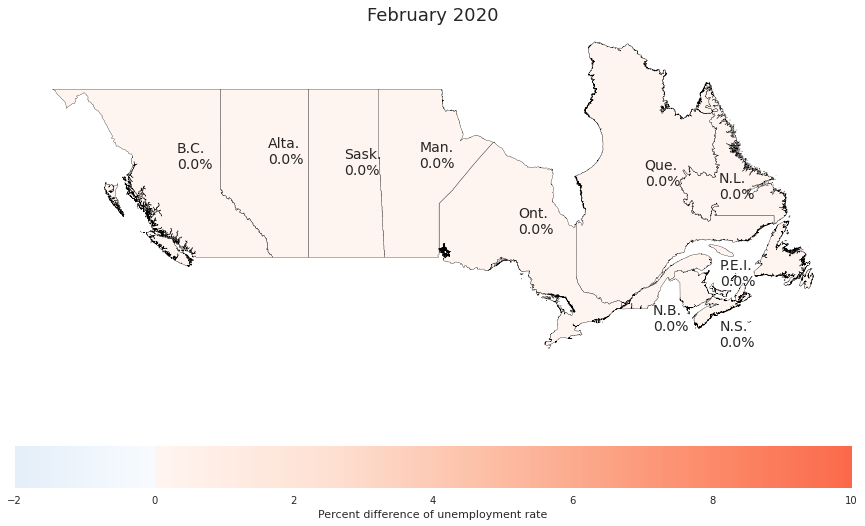

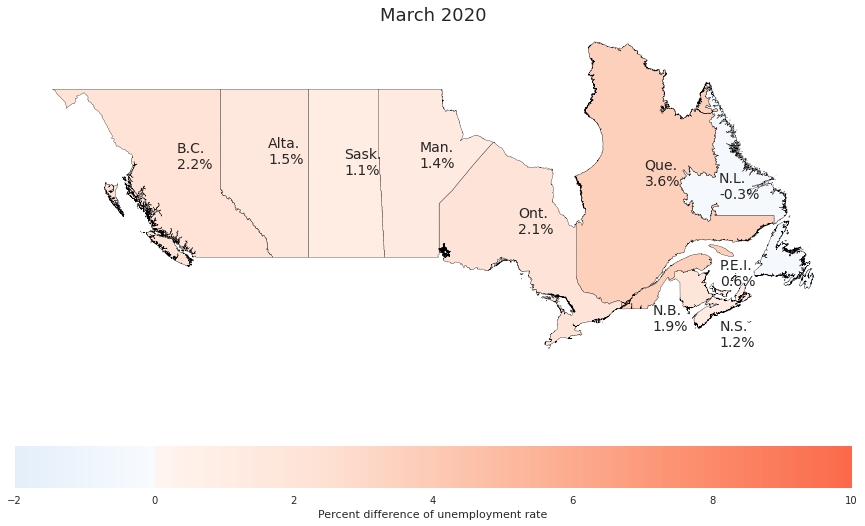

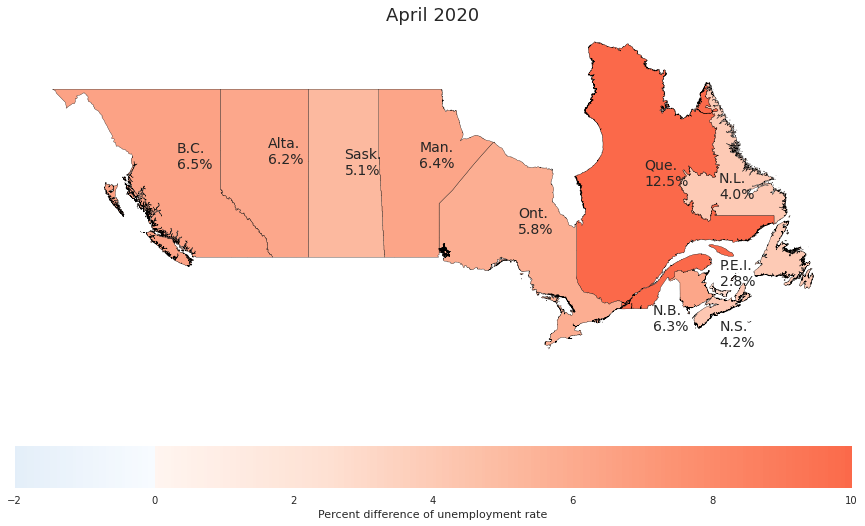

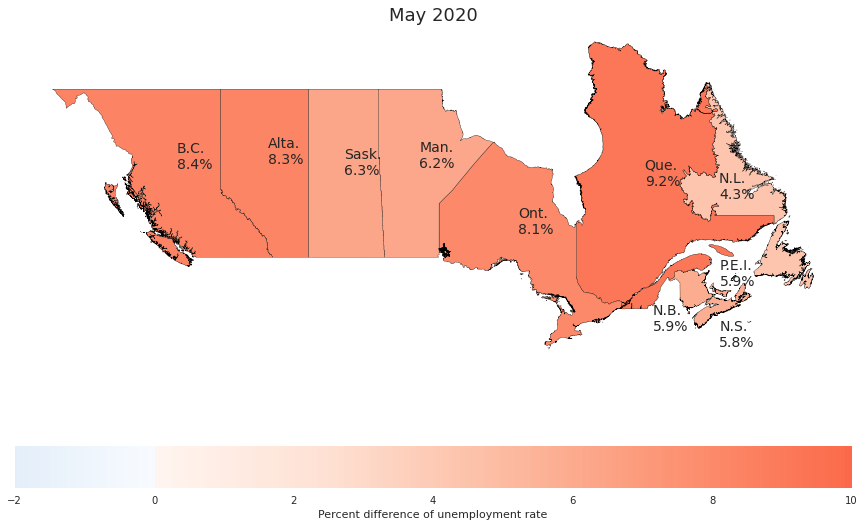

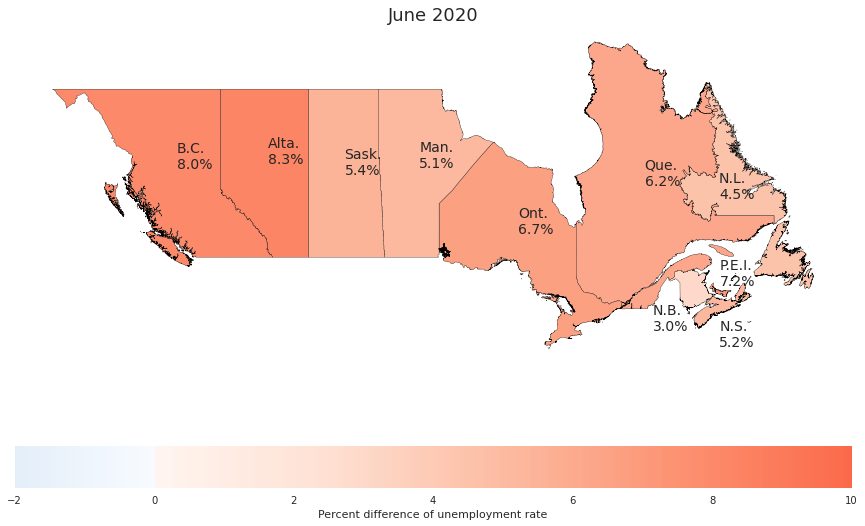

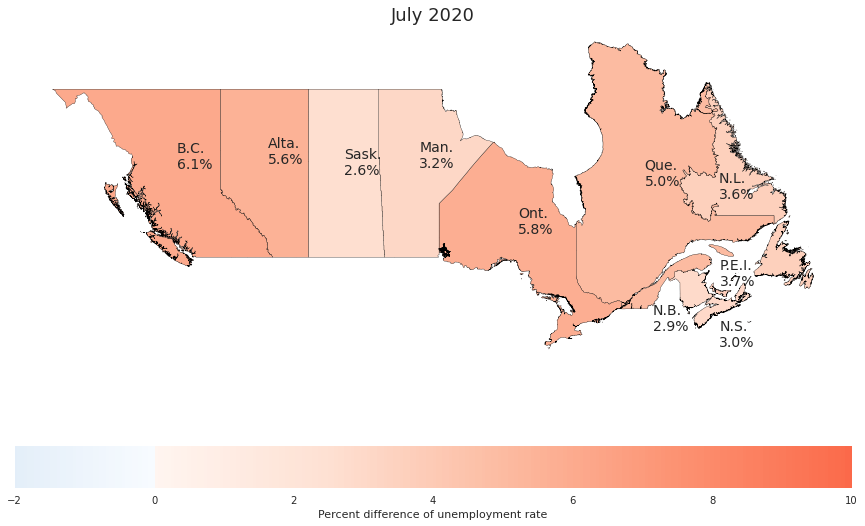

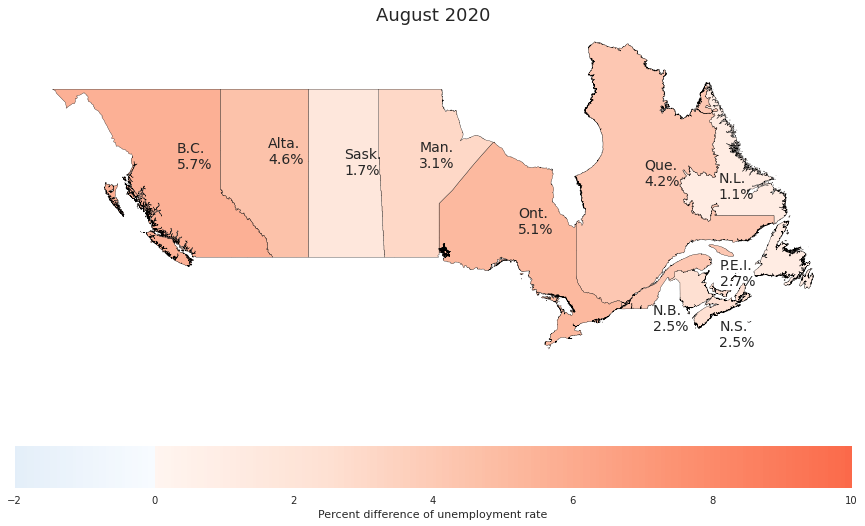

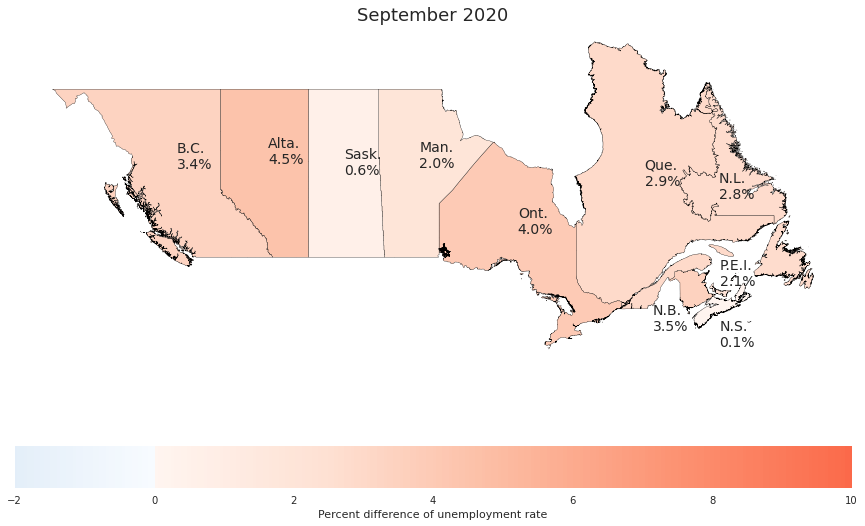

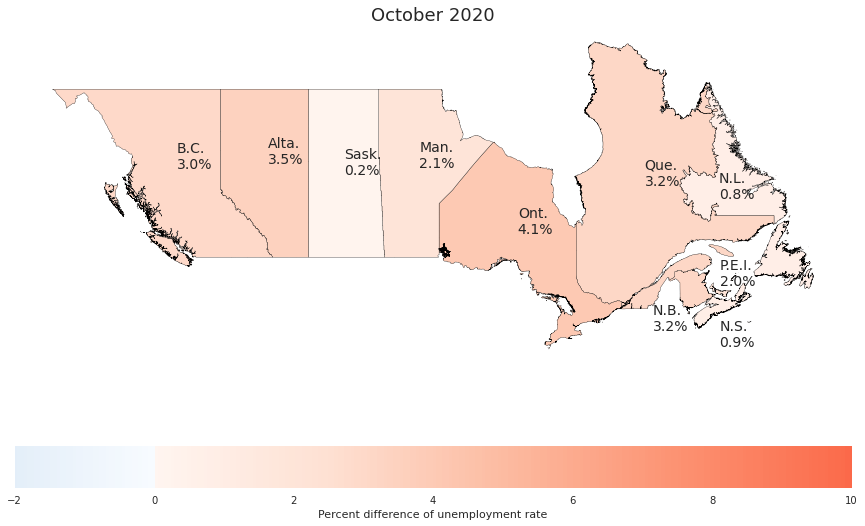

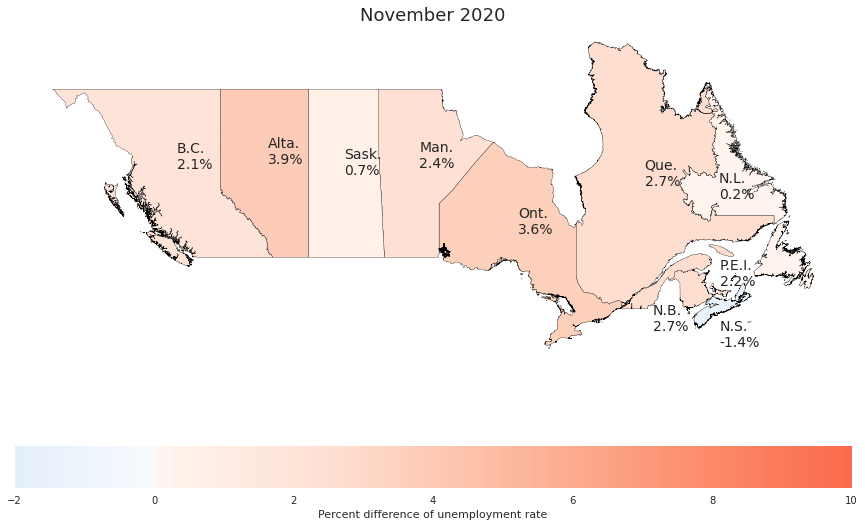

In [14]:
#Input
REFERENCE_DATE = '2020-02-15'
END_DATE = '2020-11-15'

ref_date = pd.DatetimeIndex([REFERENCE_DATE])
dates = df_u_provinces[df_u_provinces['REF_DATE']>=REFERENCE_DATE]['REF_DATE'].unique()
dates = pd.DatetimeIndex(dates)
num_rows = len(dates)

for i, date in enumerate(dates):
    ax, fig = plot_choropleth(date, REFERENCE_DATE, df_u_provinces, canada_map)
# Function to generate png figure disabled
#     fig.savefig(f'charts/unemployment_canada_{i:03d}.png', 
#               dpi=300, format='png', 
#               bbox_inches='tight')
    plt.show()
    plt.close()

<h2>COVID-19 by Province</h2>

In [15]:
#Read population data
#Source: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901&cubeTimeFrame.startMonth=04&cubeTimeFrame.startYear=2020&cubeTimeFrame.endMonth=04&cubeTimeFrame.endYear=2020&referencePeriods=20200401%2C20200401
df_population = pd.read_csv('data_part3/1710000901_population2020Q2.csv')
df_population = df_population.set_index('GEO')[['VALUE']]


In [16]:
#Read data
df_covid_info = pd.read_csv('data_part3/covid19-data-dictionary.csv')
df_covid = pd.read_csv('data_part3/covid19-download.csv')

In [17]:
#Modifying date string to datetime
df_covid['date'] = pd.to_datetime(df_covid['date'])

In [18]:
#Filtering dataframe for concerned variables
columns = ['prname', 'date', 'numconf', 'numprob',
       'numdeaths', 'numtotal', 'numtested', 'numrecover', 'percentrecover',
       'ratetested', 'numtoday', 'percentoday', 'ratetotal', 'ratedeaths',
       'numdeathstoday', 'percentdeath', 'numtestedtoday', 'numrecoveredtoday',
       'percentactive', 'numactive', 'rateactive']
df_covid = df_covid[columns]

#Filtering dataframe for provinces
df_covid_prov = df_covid[df_covid['prname'].isin(provinces)]

In [19]:
#Merge dataframe with population and calculate ratio of new covid-19 cases over population as percentage
df_covid_prov = df_covid_prov.merge(df_population, left_on = 'prname', right_on = 'GEO')
df_covid_prov = df_covid_prov.rename(columns = {'VALUE':'population'})
df_covid_prov['numtotal_over_pop'] = df_covid_prov['numtoday']/df_covid_prov['population']*100

<h2>Comparison between unemployment and COVID-19</h2>


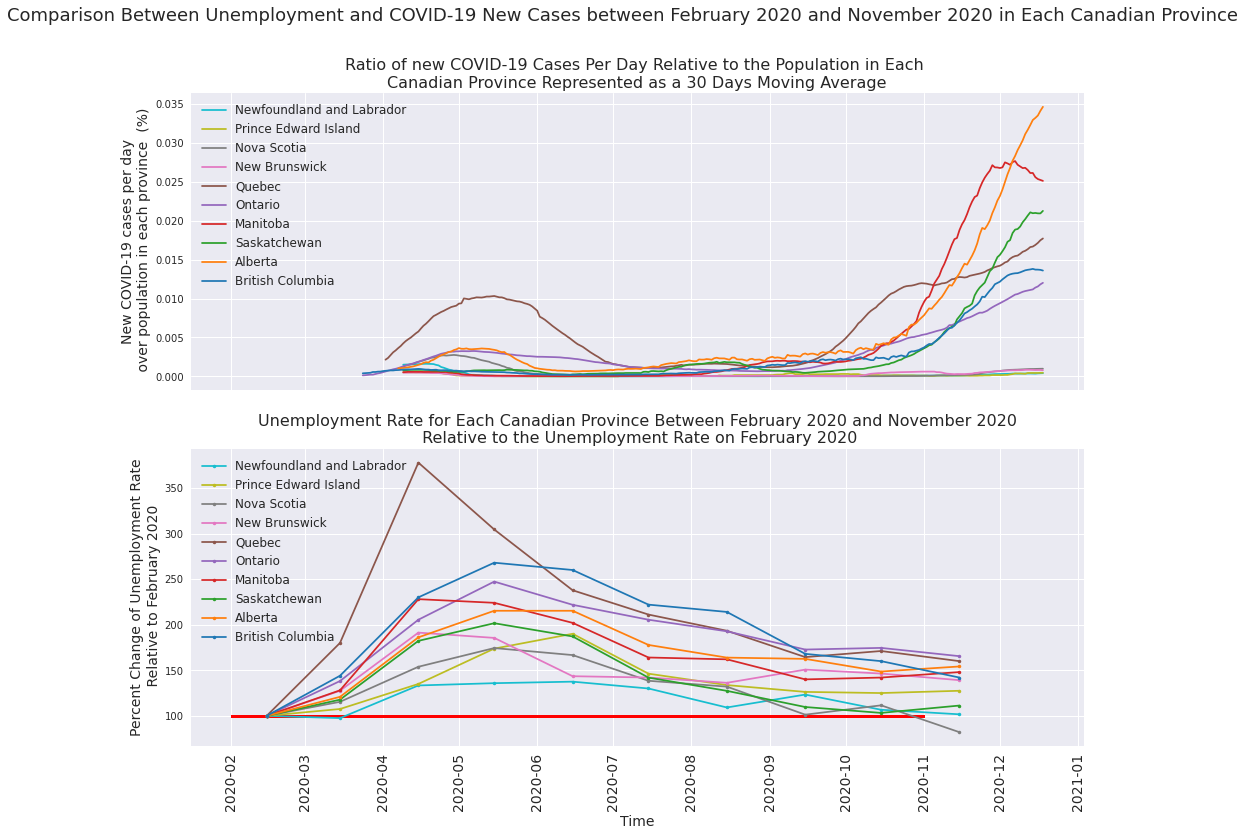

In [20]:
#Input
num_rows = 2

TIME_START = '2020-02'
TIME_END = '2020-11'
REFERENCE_DATE = TIME_START
ref_date = pd.DatetimeIndex([REFERENCE_DATE])
t_end = pd.DatetimeIndex([TIME_END])
ROLLING_WINDOW_DAYS = 30

#Graphs
mpl.style.use('seaborn')
color_lines = list(mcolors.TABLEAU_COLORS.values())
fig, (ax1, ax2) = plt.subplots(num_rows,sharex = True, figsize=(16,12))
for p in provinces:
    c = color_lines.pop()
    #Covid
    temp = df_covid_prov[df_covid_prov['prname'] == p].set_index('date')
    temp_rolling = temp.rolling(ROLLING_WINDOW_DAYS).mean()
    ax1.plot(temp_rolling.index, temp_rolling['numtotal_over_pop'], color = c , label=p)
    ax1.legend(loc='upper left', fontsize=12)
    #Unemployment
    df_temp = df_u_provinces[df_u_provinces['GEO']==p]
    df_temp = df_temp.set_index(df_temp['REF_DATE'])
    df_temp = df_temp[TIME_START : TIME_END]
    REFERENCE_VALUE = df_temp.loc[REFERENCE_DATE]['VALUE'].values[0]
    df_temp['VALUE_INDEX'] = df_temp['VALUE']/REFERENCE_VALUE*100
    ax2.plot(df_temp.index, df_temp['VALUE_INDEX'], marker = '.', color =c , label=p)
    ax2.hlines(100, xmin=pd.to_datetime(TIME_START), xmax=pd.to_datetime(TIME_END), color = 'red', linewidth = 3)
    ax2.legend(loc='upper left', fontsize=12)


ax2.set_ylabel(f'Percent Change of Unemployment Rate\n Relative to {ref_date.month_name()[0]} {ref_date.year[0]}', fontsize=14)
ax1.set_ylabel('New COVID-19 cases per day\n over population in each province  (%)', fontsize=14)
ax2.set_title(f'Unemployment Rate for Each Canadian Province Between {ref_date.month_name()[0]} {ref_date.year[0]} \
and {t_end.month_name()[0]} {t_end.year[0]}\n Relative to the Unemployment Rate on {ref_date.month_name()[0]}\
 {ref_date.year[0]}', fontsize=16)
ax1.set_title(f'Ratio of new COVID-19 Cases Per Day Relative to the Population in Each \nCanadian Province Represented\
 as a {ROLLING_WINDOW_DAYS} Days Moving Average', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.suptitle(f'Comparison Between Unemployment and COVID-19 New Cases between {ref_date.month_name()[0]} {ref_date.year[0]} \
and {t_end.month_name()[0]} {t_end.year[0]} in Each Canadian Province', fontsize=18)
ax2.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=90, fontsize=14)

# Function to generate png figure disabled
# fig.savefig(f'charts/unemployment_vs_covid_19.png', 
#               dpi=300, format='png', 
#               bbox_inches='tight')
plt.show()
plt.close()

<h3>Proportion of Industries in each Province</h3>

In [21]:
#Source: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3610040201
df_industry = pd.read_csv('data_part3/36100402-eng/36100402.csv')
df_industry_meta = pd.read_csv('data_part3/36100402-eng/36100402_MetaData.csv')

In [22]:
df_industry['REF_DATE'] = df_industry['REF_DATE'].astype(str)+'-12-31'

In [23]:
df_industry['REF_DATE'] = pd.to_datetime(df_industry['REF_DATE']) 

In [24]:
df_industry = df_industry.set_index('REF_DATE')

In [25]:
df_industry = df_industry.loc['2017']

In [26]:
df_industry = df_industry[df_industry['GEO'].isin(provinces)]

In [27]:
sectors = [ 'Agriculture, forestry, fishing and hunting', 'Mining, quarrying, and oil and gas extraction', 'Utilities', 'Construction',
          'Manufacturing','Wholesale trade','Retail trade \\[44\\-45\\]', 'Transportation and warehousing', 'Information and cultural industries',
          'Finance and insurance','Real estate and rental and leasing', 'Professional, scientific and technical services',
          'Management of companies and enterprises', 'Administrative and support, waste management and remediation services',
          'Educational services', 'Health care and social assistance', 'Arts, entertainment and recreation', 'Accommodation and food services',
          'Other services \\(except public administration\\)', 'Public administration', 'All industries \\[T001\\]'] 
sectors = '|'.join(sectors)

df_industry= df_industry[df_industry['North American Industry Classification System (NAICS)'].str.contains(sectors, regex= True)]

In [28]:
df_industry = df_industry[df_industry['Value'] == 'Current dollars']

In [29]:
df_industry = df_industry[['GEO', 'North American Industry Classification System (NAICS)', 'SCALAR_FACTOR', 'VALUE']]
df_industry = df_industry.dropna()


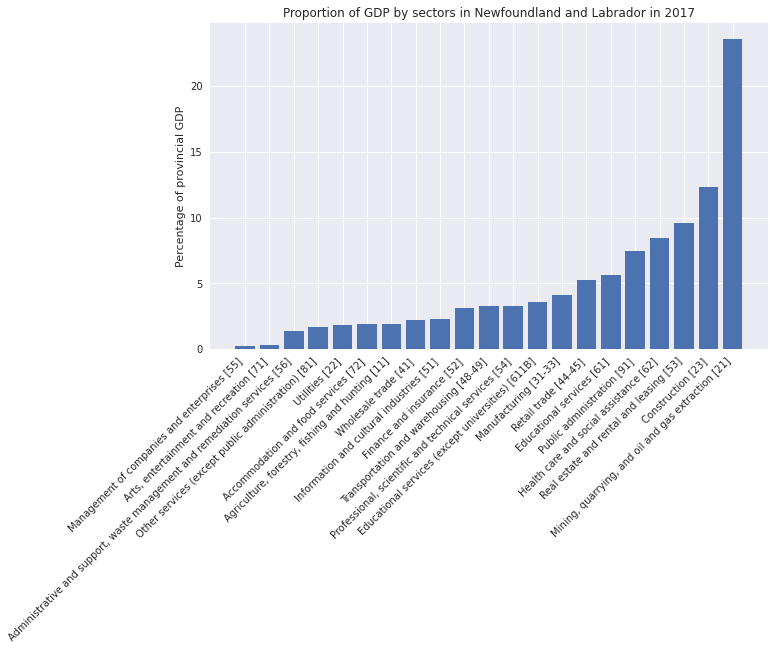

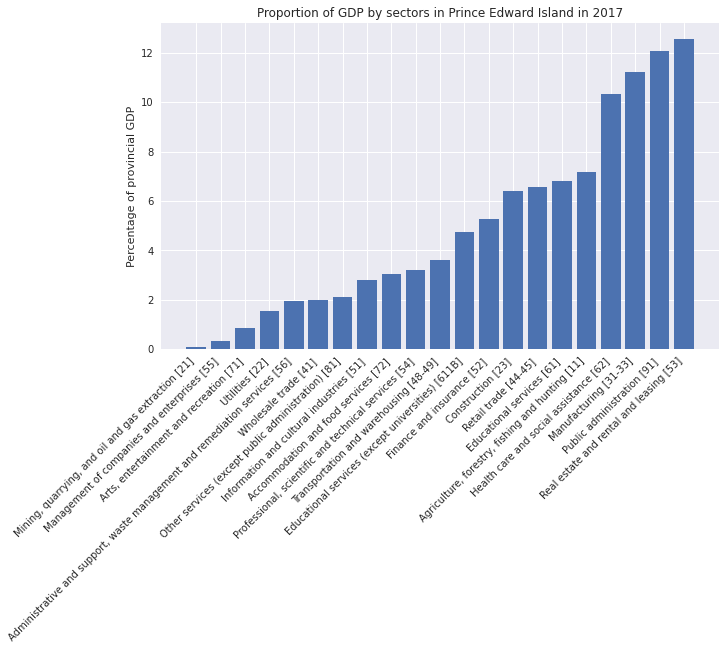

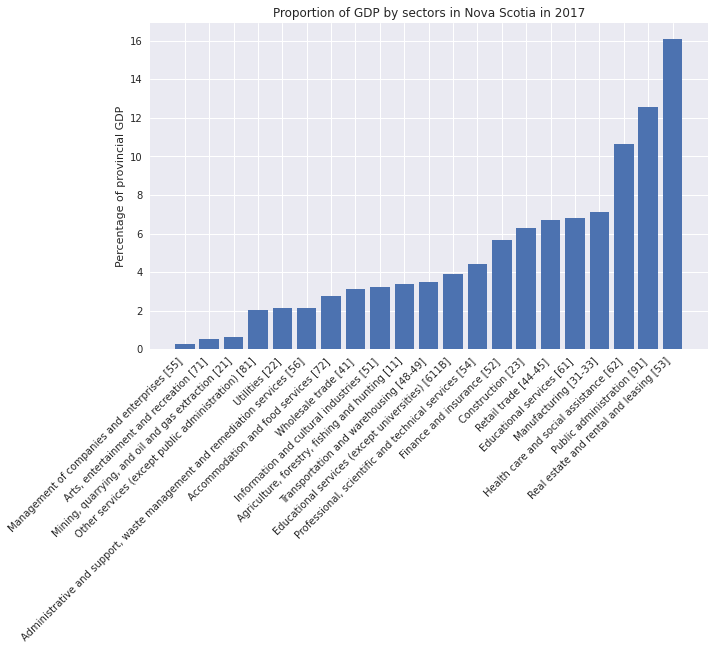

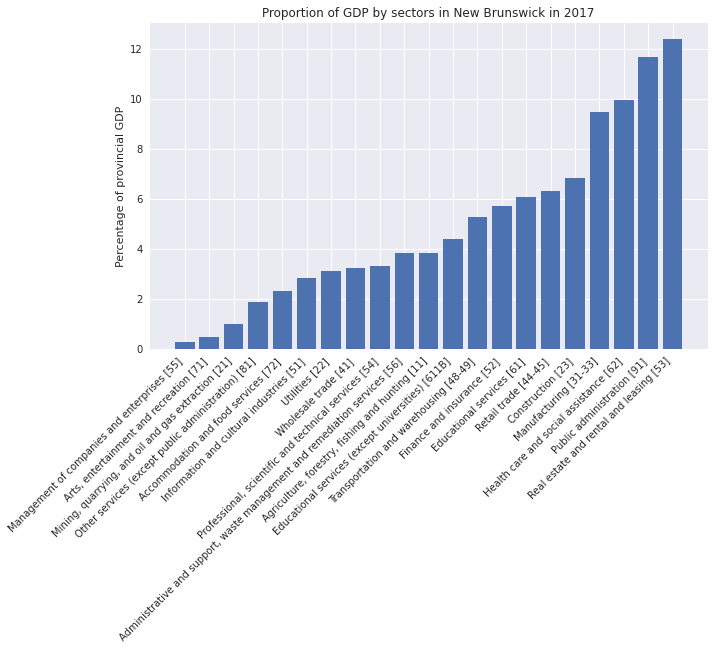

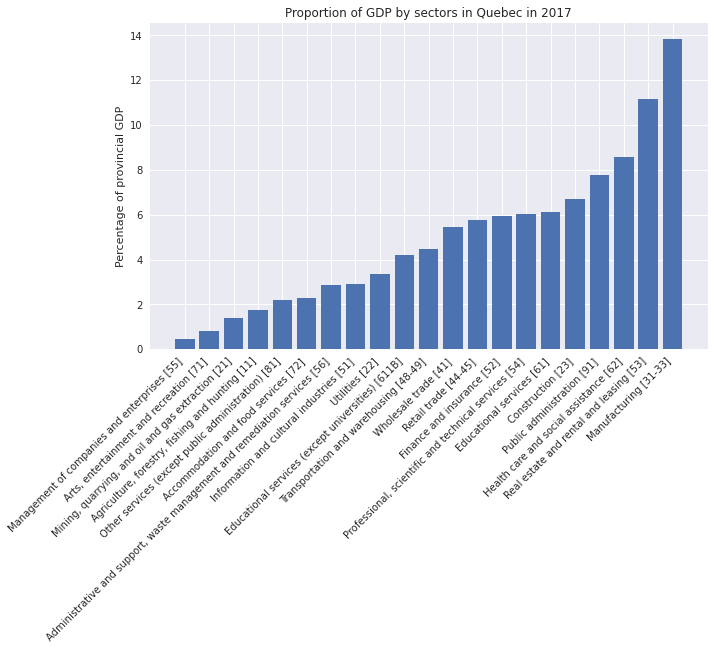

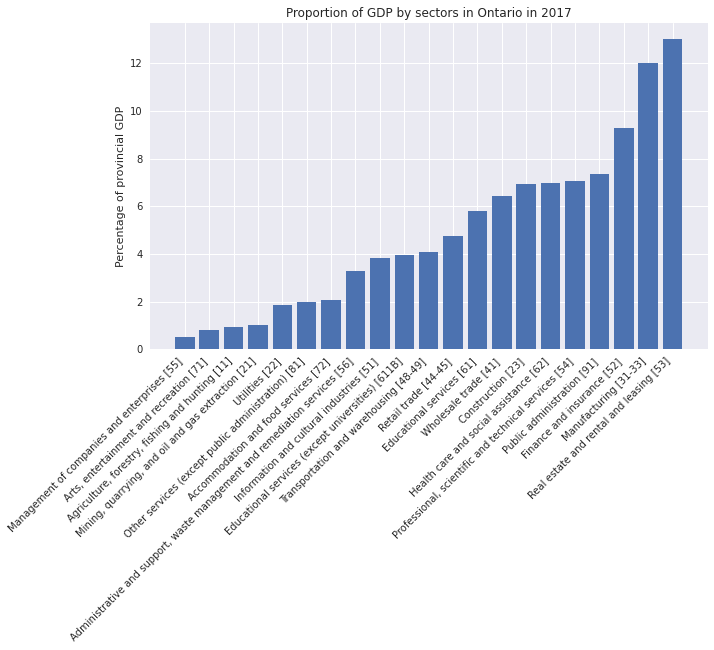

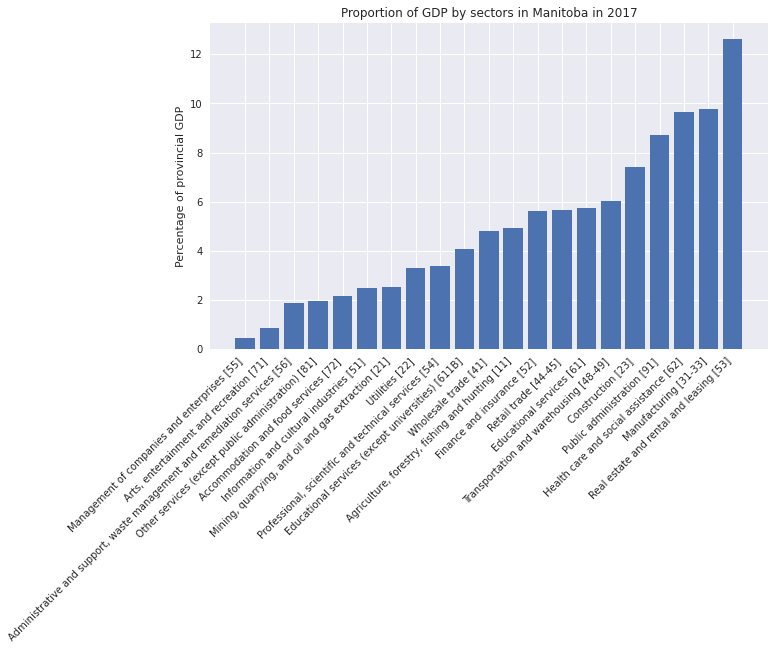

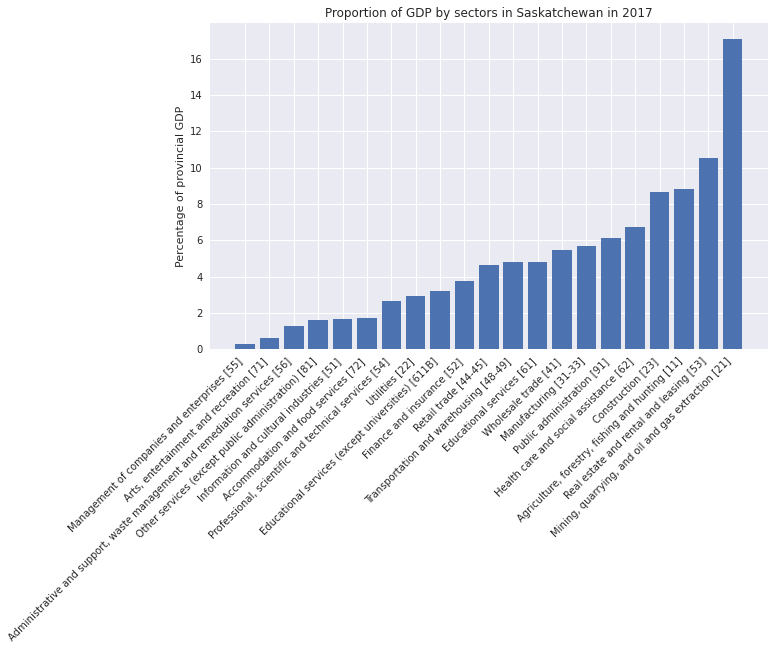

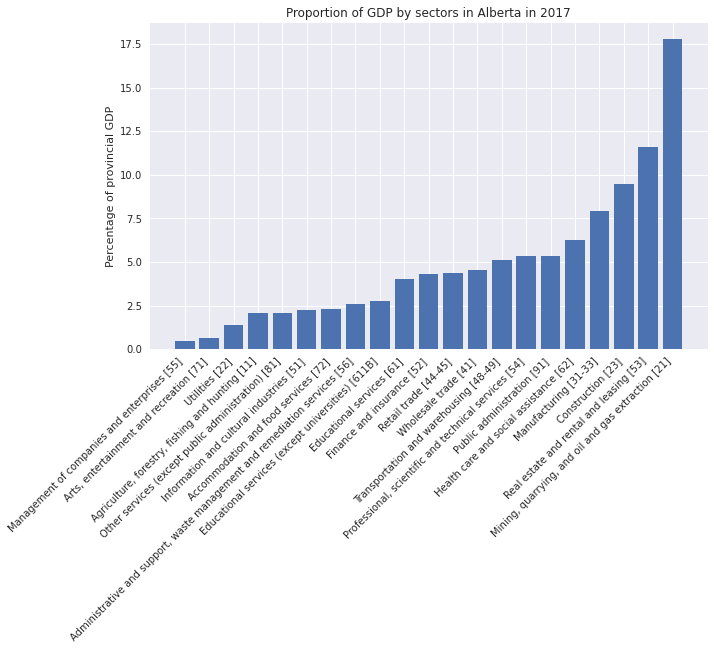

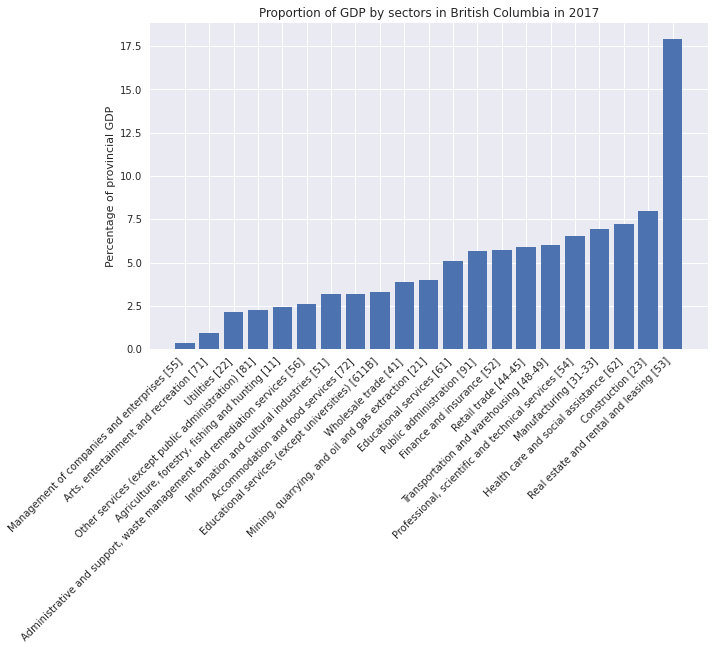

In [30]:
def province_by_industry(province, df):
    df = df.copy()
    mask = df['GEO'] == province
    df_temp = df[mask].set_index('North American Industry Classification System (NAICS)')
    total_gdp = df_temp[df_temp.index =='All industries [T001]']['VALUE'].sort_values()[0]
    new = df_temp['VALUE']/total_gdp*100
    df_temp = df_temp.merge(new, left_index = True, right_index=True)
    df_temp = df_temp.rename(columns = {'VALUE_x': 'VALUE','VALUE_y': 'percent_gdp'})
    df_temp = df_temp[df_temp.index!= 'All industries [T001]'].sort_values('percent_gdp')
    return df_temp

for p in provinces:
    new_df = province_by_industry(p, df_industry)
    fig,ax = plt.subplots(figsize=(10,6))
    ax.bar(np.arange(len(new_df)), height=new_df['percent_gdp'])
    x_labels = new_df.index
    ax.set_xticks(np.arange(len(new_df)))
    ax.set_xticklabels(x_labels, rotation =45, ha ='right')
    plt.title(f'Proportion of GDP by sectors in {p} in 2017')
    plt.ylabel('Percentage of provincial GDP')
    
# Function to generate png figure disabled
#     fig.savefig(f'charts/unemployment_industries_{p}.png', 
#         dpi=300, format='png', 
#         bbox_inches='tight')
    plt.show()
    
 